In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:

# # 获取当前文件夹下所有的 CSV 文件
# file_list = glob.glob('./distilbert/*.csv')

# # 用一个空的 DataFrame 开始合并
# combined_df = pd.DataFrame()

# # 循环读取每个 CSV 文件并合并到 combined_df 中
# for file in file_list:
#     df = pd.read_csv(file)
#     if df.empty:
#         continue    
#     combined_df =  pd.concat([combined_df, df], ignore_index=True)

In [3]:
# data = combined_df[['sentiment_scores','times']].copy()
# print(data.head())
# data.describe()

In [4]:
# # 首先将日期转换为 datetime 类型，并设置为索引
# data['times'] = pd.to_datetime(data['times'])
# data.set_index('times', inplace=True)
# # 显示前几行以确认
# print(data.head())
# data.to_csv("datas_per_day.csv")

In [5]:
data = pd.read_csv('datas_per_day.csv')
# 首先将日期转换为 datetime 类型，并设置为索引
data['times'] = pd.to_datetime(data['times'])
data.set_index('times', inplace=True)

print(data.head())
data.info()

                                             sentiment_scores
times                                                        
2006-10-20                              [-0.9542459575923036]
2006-10-21                              [-0.9570303238355197]
2006-10-23         [-0.9927112082677888, -0.9917036611206678]
2006-10-24  [-0.9964825129508972, -0.9983683228492737, -0....
2006-10-25         [-0.9882315009590087, -0.2986226595231216]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1131 entries, 2006-10-20 to 2011-08-31
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sentiment_scores  1131 non-null   object
dtypes: object(1)
memory usage: 17.7+ KB


In [6]:
# # 然后填充缺失的日期
# # 生成一个包含所有日期的完整序列
# all_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')
# # 将原始数据与完整日期序列进行合并
# data = data.reindex(all_dates)
# print(data.head())
# # 使用向前填充处理缺失值
# data['sentiment_scores'].ffill()
# # 检查是否还有缺失值
# missing_after_ffill = data.isnull().sum()
# print("缺失值数量（向前填充后）:\n", missing_after_ffill)
# # 如果仍然有缺失值，可以使用向后填充
# if missing_after_ffill.sum() > 0:
#     data['sentiment_scores'].bfill()


In [7]:
# 由于情感得分是列表形式，计算每天情感得分的平均值
data['sentiment_score_avg'] = data['sentiment_scores'].apply(lambda x: np.mean(eval(x)))
print(data.head())


                                             sentiment_scores  \
times                                                           
2006-10-20                              [-0.9542459575923036]   
2006-10-21                              [-0.9570303238355197]   
2006-10-23         [-0.9927112082677888, -0.9917036611206678]   
2006-10-24  [-0.9964825129508972, -0.9983683228492737, -0....   
2006-10-25         [-0.9882315009590087, -0.2986226595231216]   

            sentiment_score_avg  
times                            
2006-10-20            -0.954246  
2006-10-21            -0.957030  
2006-10-23            -0.992207  
2006-10-24            -0.562342  
2006-10-25            -0.643427  


In [8]:
# import matplotlib.pyplot as plt

# # 绘制情感得分均值的散点图
# plt.figure(figsize=(12, 6))  # 设置图形的大小
# plt.scatter(data.index, data['sentiment_score_avg'], label='Sentiment Score Average', alpha=0.6)  # 绘制散点图
# plt.title('Sentiment Score Average Over Time')  # 添加标题
# plt.xlabel('Date')  # 添加 x 轴标签
# plt.ylabel('Average Sentiment Score')  # 添加 y 轴标签
# plt.legend()  # 显示图例
# plt.show()  # 显示图表

In [9]:
# 定义一个函数来调整日期为每个季度的第一天
def adjust_quarter_start_dates(index):
    return pd.to_datetime(index.year.astype(str) + '-' + (3 * (index.quarter - 1) + 1).astype(str) + '-01')
# 按季度聚合情感得分的平均值
quarterly_sentiment = data['sentiment_score_avg'].resample('Q').mean()
# 应用函数来调整季度开始日期
quarterly_sentiment.index = adjust_quarter_start_dates(quarterly_sentiment.index)
# 显示调整后的数据
print(quarterly_sentiment.head())

times
2006-10-01   -0.602685
2007-01-01   -0.716453
2007-04-01   -0.764643
2007-07-01   -0.822862
2007-10-01   -0.725898
Name: sentiment_score_avg, dtype: float64


In [10]:
# 定义一个函数来调整日期为每个月的第一天
def adjust_month_start_dates(index):
    return pd.to_datetime(index.year.astype(str) + '-' + index.month.astype(str) + '-01')
monthly_sentiment = data['sentiment_score_avg'].resample('M').mean()
# 应用函数来调整月度开始日期
monthly_sentiment.index = adjust_month_start_dates(monthly_sentiment.index)
print(monthly_sentiment.head())

times
2006-10-01   -0.792938
2006-11-01   -0.585853
2006-12-01   -0.550311
2007-01-01   -0.679840
2007-02-01   -0.639169
Name: sentiment_score_avg, dtype: float64


In [11]:
# 开始读取标签
Employment_Level = pd.read_excel('./Ecnomical_index/Monthly Employment Level.xls')
Employment_Level.head()

,observation_date,CE16OV
0,1948-01-01,58061
1,1948-02-01,58196
2,1948-03-01,57671
3,1948-04-01,58291
4,1948-05-01,57854


In [12]:
# 确保日期列为 datetime 类型
Employment_Level['observation_date'] = pd.to_datetime(Employment_Level['observation_date'])
# 将 Employment_Level 的日期列设置为索引
Employment_Level.set_index('observation_date', inplace=True)

# 合并情感得分数据和就业水平数据
combined_data = pd.concat([monthly_sentiment, Employment_Level], axis=1, join='inner')
# 检查合并后的数据
print(combined_data.head())


            sentiment_score_avg  CE16OV
2006-10-01            -0.792938  145314
2006-11-01            -0.585853  145534
2006-12-01            -0.550311  145970
2007-01-01            -0.679840  146028
2007-02-01            -0.639169  146057


In [13]:
from sklearn.preprocessing import MinMaxScaler

# 初始化归一化器
scaler = MinMaxScaler()
# 将数据归一化
combined_data_scaled = scaler.fit_transform(combined_data)
# 将归一化后的数据转换回 DataFrame
combined_data_scaled = pd.DataFrame(combined_data_scaled, columns=combined_data.columns, index=combined_data.index)

# 显示归一化后的数据
print(combined_data_scaled.head())
print(len(combined_data_scaled))

            sentiment_score_avg    CE16OV
2006-10-01             0.234956  0.850734
2006-11-01             0.480721  0.876369
2006-12-01             0.522901  0.927173
2007-01-01             0.369178  0.933931
2007-02-01             0.417446  0.937311
59


In [14]:
# 检查训练集和测试集中是否有缺失值
print("combined_data_scaled  missing values:")
print(combined_data_scaled.isnull().sum())

# 如果存在缺失值，您可以选择填充它们
# 例如，使用列的平均值填充
combined_data_scaled.fillna(combined_data_scaled.mean(), inplace=True)

# 或者，删除包含缺失值的行
# train.dropna(inplace=True)
# test.dropna(inplace=True)


combined_data_scaled  missing values:
sentiment_score_avg    1
CE16OV                 0
dtype: int64


In [16]:
n_months = 3 # 时间窗口，滚动n个月
window_size = 3 # 计算滚动特征用

In [17]:
# 假设您的原始数据集是 combined_data

# 计算统计特征
combined_data['max_value'] = combined_data['sentiment_score_avg'].rolling(window=window_size).max()
combined_data['min_value'] = combined_data['sentiment_score_avg'].rolling(window=window_size).min()
combined_data['std_dev'] = combined_data['sentiment_score_avg'].rolling(window=window_size).std()
combined_data['median'] = combined_data['sentiment_score_avg'].rolling(window=window_size).median()
combined_data['mean'] = combined_data['sentiment_score_avg'].rolling(window=window_size).mean()

# 处理边缘情况，如NaN值
combined_data.fillna(method='bfill', inplace=True)

def create_features_labels(data, n_months):
    X, y = [], []
    for i in range(n_months, len(data)):
        X.append(data.iloc[i-n_months:i][['sentiment_score_avg', 'mean', 'max_value', 'min_value', 'std_dev', 'median']].values.flatten())
        y.append(data.iloc[i, -1])  # 假设标签在最后一列
    return np.array(X), np.array(y)

# 使用新的特征和标签创建函数
X, y = create_features_labels(combined_data, n_months)

C:\Users\15163\AppData\Local\Temp\ipykernel_22464\1762277978.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='bfill', inplace=True)


In [21]:
# 样本数，特征数
print("shape of X:",X.shape,"shape of y:",y.shape)

shape of X: (56, 18) shape of y: (56,)


In [18]:
# 检查 X 和 y 中是否有缺失值 (NaN)
print("Training set missing values:")
print(np.isnan(X).sum())
print("\nTest set missing values:")
print(np.isnan(y).sum())

Training set missing values:
0

Test set missing values:
0


In [19]:
# 划分训练集和测试集
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 线性回归
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 随机森林
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# 简单神经网络
nn_model = Sequential()
nn_model.add(Dense(20, input_dim=n_months*6, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
nn_model.fit(X_train, y_train, epochs=40, batch_size=10)

Epoch 1/40
5/5 [==============================] - 1s 3ms/step - loss: 0.4124
Epoch 2/40
5/5 [==============================] - 0s 2ms/step - loss: 0.2543
Epoch 3/40
5/5 [==============================] - 0s 2ms/step - loss: 0.1439
Epoch 4/40
5/5 [==============================] - 0s 2ms/step - loss: 0.0748
Epoch 5/40
5/5 [==============================] - 0s 2ms/step - loss: 0.0388
Epoch 6/40
5/5 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 7/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0196
Epoch 8/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0190
Epoch 9/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 10/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 11/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 12/40
5/5 [==============================] - 0s 3ms/step - loss: 0.0179
Epoch 13/40
5/5 [==============================] - 0s 3ms/step - loss: 0.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return mse, rmse, r2

# 线性回归模型评估
lr_mse, lr_rmse, lr_r2 = evaluate_model(lr_model, X_test, y_test)
print("Linear Regression - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lr_mse, lr_rmse, lr_r2))

# 随机森林模型评估
rf_mse, rf_rmse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
print("Random Forest - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rf_mse, rf_rmse, rf_r2))

# 神经网络模型评估
nn_mse, nn_rmse, nn_r2 = evaluate_model(nn_model, X_test, y_test)
print("Neural Network - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(nn_mse, nn_rmse, nn_r2))

Linear Regression - MSE: 0.0005, RMSE: 0.0231, R2: -0.4057
Random Forest - MSE: 0.0005, RMSE: 0.0231, R2: -0.4103
1/1 [==============================] - 0s 105ms/step
Neural Network - MSE: 0.0005, RMSE: 0.0232, R2: -0.4297


In [24]:
# 合并 X 训练集和 X 测试集
X_combined = np.vstack((X_train, X_test))
# 合并真实标签
y_combined = np.concatenate((y_train, y_test))

In [30]:
def model_evaluation(model,model_name,X_combined,y_combined):
    # 使用某个模型进行预测,nn_model,rf_model,lr_model
    predicted = model.predict(X_combined)
    # 将预测结果转换为一维数组方便绘图
    predicted = predicted.ravel()
    # 绘制真实值和预测值
    plt.figure(figsize=(10,6))
    plt.plot(y_combined, label='Actual')
    plt.plot(predicted, label='Predicted')
    plt.title(f"{model_name} Prediction vs Actual")
    plt.xlabel("Observations")
    plt.ylabel("Target")
    plt.legend()
    plt.show()

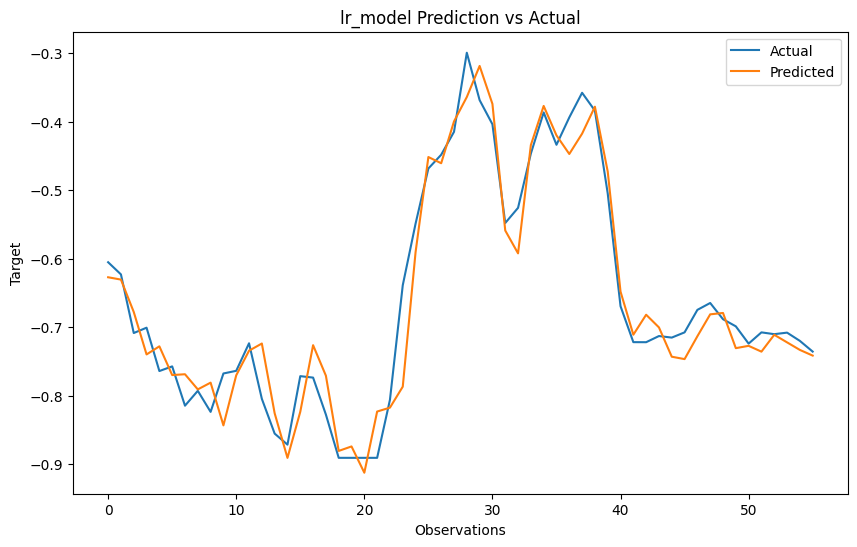

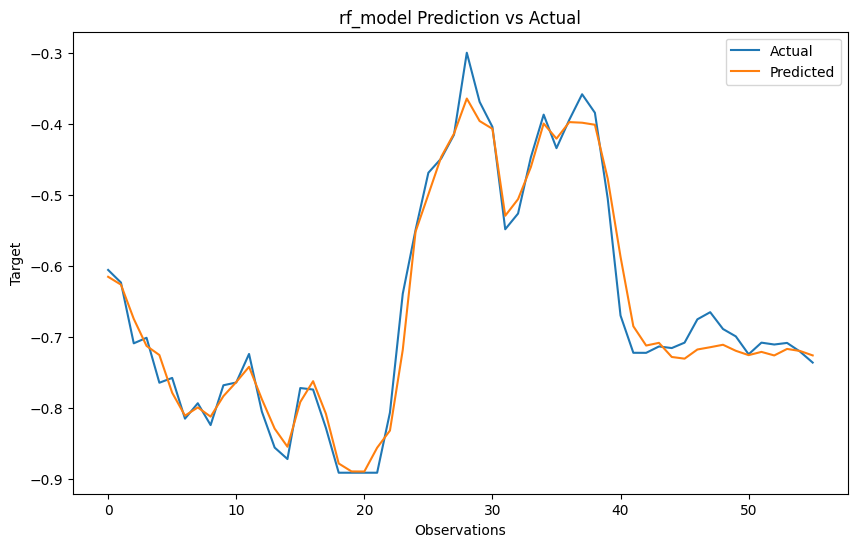

2/2 [==============================] - 0s 4ms/step


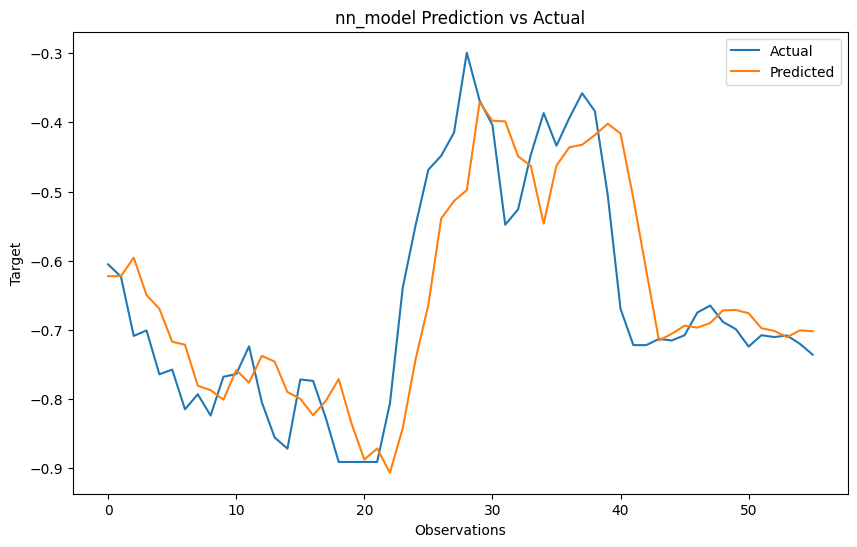

In [31]:
model_evaluation(lr_model,'lr_model',X_combined,y_combined)
model_evaluation(rf_model,'rf_model',X_combined,y_combined)
model_evaluation(nn_model,'nn_model',X_combined,y_combined)

In [32]:
# 硬着头皮试一下RNN,lstm 和 GRU
# 重塑数据以适应 RNN, LSTM, GRU 模型
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

X_train_rnn.shape

(44, 1, 18)

In [33]:
import matplotlib.pyplot as plt

def plt_history(history):
    # 绘制训练损失和验证损失
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training Curve')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

In [34]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

# 定义 RNN 模型
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
rnn_model.add(Dense(1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 RNN 模型
# 假设使用的是 LSTM 模型
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(rnn_history)

# 定义 LSTM 模型
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
# 训练 LSTM 模型
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(lstm_history)

# 定义 GRU 模型
gru_model = Sequential()
gru_model.add(GRU(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# 训练 GRU 模型
# 训练 LSTM 模型
GRU_history = gru_model.fit(X_train_rnn, y_train, epochs=30, batch_size=32)
# plt_history(GRU_history)


Epoch 1/30
2/2 [==============================] - 1s 5ms/step - loss: 0.7773
Epoch 2/30
2/2 [==============================] - 0s 7ms/step - loss: 0.5488
Epoch 3/30
2/2 [==============================] - 0s 4ms/step - loss: 0.3761
Epoch 4/30
2/2 [==============================] - 0s 6ms/step - loss: 0.2358
Epoch 5/30
2/2 [==============================] - 0s 6ms/step - loss: 0.1317
Epoch 6/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0662
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 0.0254
Epoch 8/30
2/2 [==============================] - 0s 11ms/step - loss: 0.0078
Epoch 9/30
2/2 [==============================] - 0s 7ms/step - loss: 0.0072
Epoch 10/30
2/2 [==============================] - 0s 8ms/step - loss: 0.0145
Epoch 11/30
2/2 [==============================] - 0s 6ms/step - loss: 0.0252
Epoch 12/30
2/2 [==============================] - 0s 6ms/step - loss: 0.0328
Epoch 13/30
2/2 [==============================] - 0s 3ms/step - loss: 0

In [35]:
# rnn模型评估
rnn_mse, rnn_rmse, rnn_r2 = evaluate_model(rnn_model, X_test_rnn, y_test)
print("RNN - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(rnn_mse, rnn_rmse, rnn_r2))

# lstm模型评估
lstm_mse, lstm_rmse, lstm_r2 = evaluate_model(lstm_model, X_test_rnn, y_test)
print("LSTM - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(lstm_mse, lstm_rmse, lstm_r2))

# GRU模型评估
gru_mse, gru_rmse, gru_r2 = evaluate_model(gru_model, X_test_rnn, y_test)
print("GRU - MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}".format(gru_mse, gru_rmse, gru_r2))

1/1 [==============================] - 0s 163ms/step
RNN - MSE: 0.0006, RMSE: 0.0236, R2: -0.4676
1/1 [==============================] - 0s 403ms/step
LSTM - MSE: 0.0012, RMSE: 0.0345, R2: -2.1454
1/1 [==============================] - 0s 205ms/step
GRU - MSE: 0.0011, RMSE: 0.0331, R2: -1.8951


In [36]:
# 合并 X_rnn训练集和 X_rnn 测试集
X_combined_rnn = np.vstack((X_train_rnn, X_test_rnn))

2/2 [==============================] - 0s 3ms/step


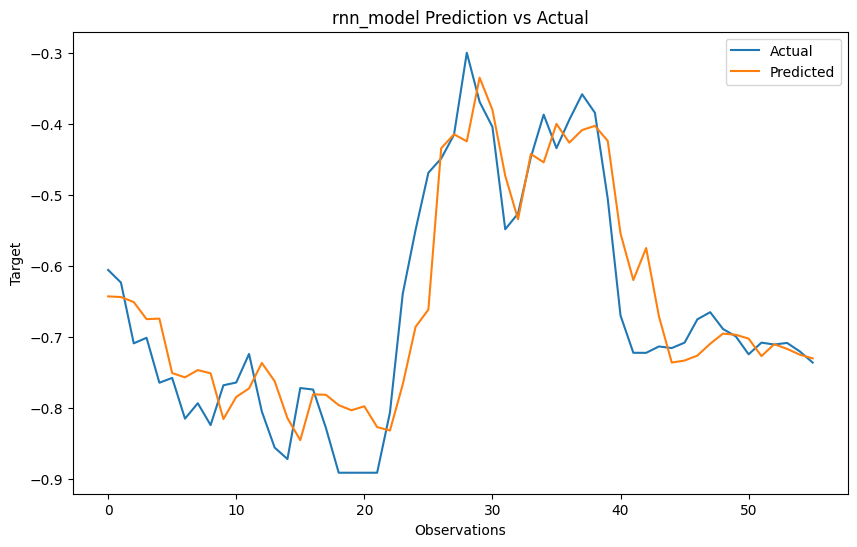

2/2 [==============================] - 0s 4ms/step


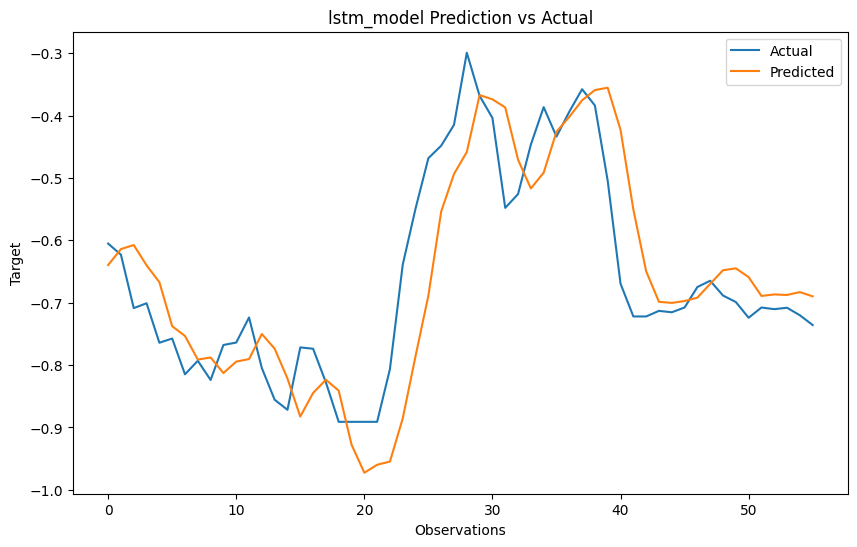

2/2 [==============================] - 0s 6ms/step


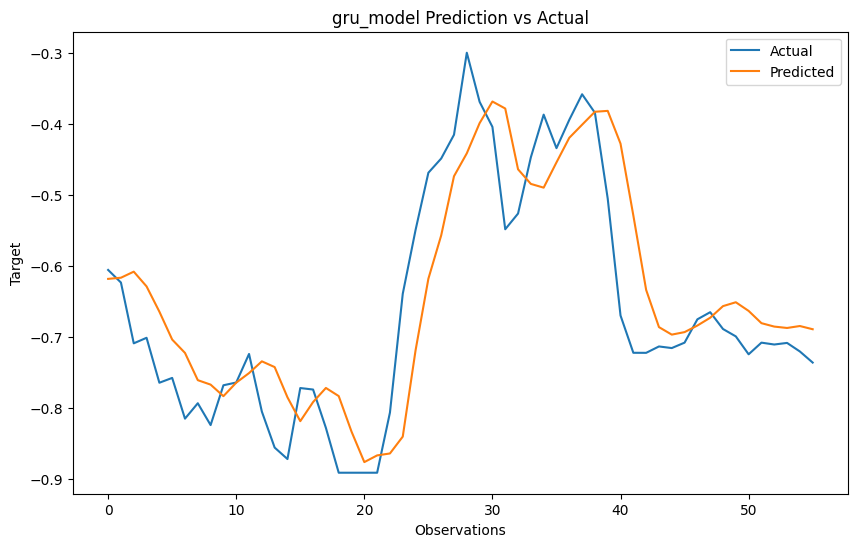

In [37]:
model_evaluation(rnn_model,'rnn_model',X_combined_rnn,y_combined)
model_evaluation(lstm_model,'lstm_model',X_combined_rnn,y_combined)
model_evaluation(gru_model,'gru_model',X_combined_rnn,y_combined)